<a href="https://colab.research.google.com/github/Fuad3004/MachineLearning-with-Pytorch/blob/main/PyTorch_Computer_Vision_1_Dataset_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Computer Vision applying on Multiclass classification datasets fashionMNIST Using nn.flaten layer and nn.linear layers:

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


#Dataset

  

In [2]:
train_data= datasets.FashionMNIST(root="data", 
                                  train=True, 
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

test_data= datasets.FashionMNIST( root="data", 
                                  train=False, 
                                  download=True,
                                  transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 15671541.11it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 268645.68it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5073351.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13622887.69it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image,label =train_data[0]

image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
a=image.squeeze()
a.shape


torch.Size([28, 28])

In [6]:
len(train_data.data), len(train_data.targets),len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#Data Visualization

Image Shape:torch.Size([1, 28, 28])


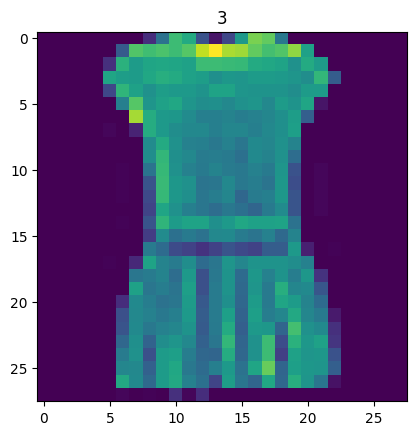

In [8]:
image, label= train_data[3]

print(f"Image Shape:{image.shape}")

plt.imshow(image.squeeze()) # image size 28*28
plt.title(label);

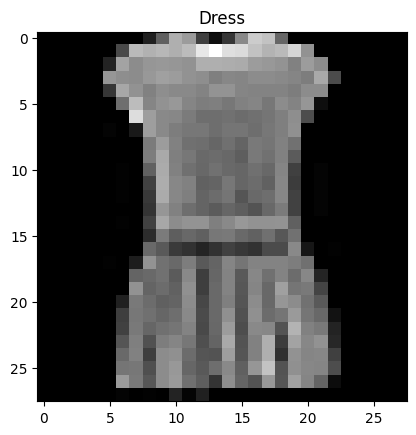

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);

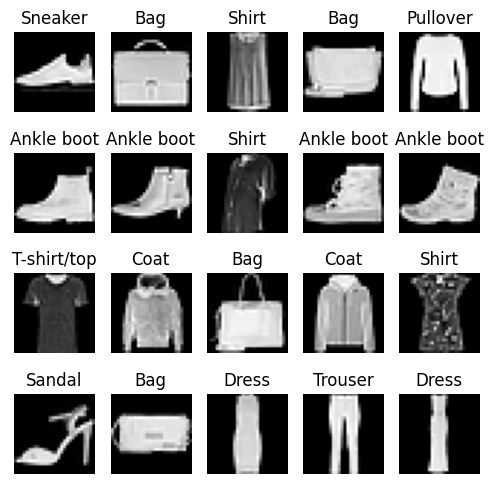

In [10]:
torch.manual_seed(33)
fig= plt.figure(figsize =(6,6))
rows,cols =4,5

for i in range (1, rows*cols+1):

  random_indx= torch.randint(0, len(train_data), size=[1]).item() #item confirms random_indx is a python integer not a tensor
  img,label=train_data[random_indx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);



#DATA Loader

* It turns datasets into a Python iterable small batches!


In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(train_data,
                            batch_size=BATCH_SIZE, 
                            shuffle=True)

test_dataloader=DataLoader(test_data,
                           batch_size=BATCH_SIZE, 
                           shuffle=True)


In [12]:
print(f"Dataloaders:{train_dataloader,test_dataloader}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x7fa5a6fec220>, <torch.utils.data.dataloader.DataLoader object at 0x7fa5a6fec4f0>)


In [13]:
print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")

print(f"Length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader:1875 batches of 32
Length of test dataloader:313 batches of 32


In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Every Sample gets same size

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


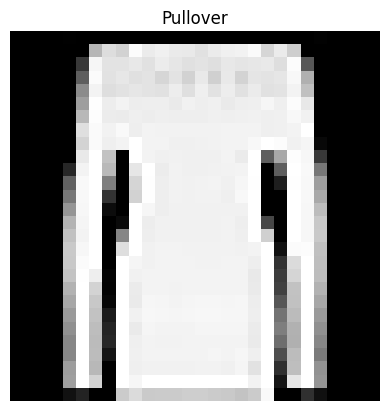

In [15]:
torch.manual_seed(33)
random_indx= torch.randint(0, len(train_features_batch), size=[1]).item() #item confirms random_indx is a python integer not a tensor
img,label=train_features_batch[random_indx],train_labels_batch[random_indx]
# fig.add_subplot(rows,cols,i)
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

#Build a baseline model

In [16]:
flatten_model=nn.Flatten()

x=train_features_batch[0]

output=flatten_model(x)

print(f"Shape before flattening:{x.shape}")

print(f"Shape after flattening:{output.shape}")


Shape before flattening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [17]:
from torch import nn

class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )

  def forward(self,x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(33)

# Need to setup model with input parameters
model_0 = FashionMNISTModel(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu")

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#LOSS OPTIMIZER ACC


In [19]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
loss_fn=nn.CrossEntropyLoss()

optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

Creating a function to check out time

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device:torch.device=None):

  total_time=end-start
  print(f"Train time on{device}: {total_time:.3f} seconds")

  return total_time

#Building Training Loop

In [22]:
from tqdm.auto import tqdm #progress bar er jonno

torch.manual_seed(33)
train_time_start_on_cpu = timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_loss=0

  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss+=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch%400==0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  
  train_loss /= len(train_dataloader)

  test_loss, test_acc=0, 0
  model_0.eval()

  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred= model_0(X)

      test_loss+= loss_fn(test_pred,y)

      test_acc+= accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.58761 | Test loss: 0.50525, Test acc: 82.53%

Epoch: 1
---------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.47457 | Test loss: 0.51251, Test acc: 81.29%

Epoch: 2
---------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

Train loss: 0.45442 | Test loss: 0.46581, Test acc: 83.83%

Train time oncpu: 49.104 seconds
